In [1]:
import pandas as pd
import numpy as np

import os
os.chdir('/home/spankaew/Git/astrologics')
import astrologics as le

In [2]:
model_name = 'Human Gonadal Sex Determination_26573569'

In [3]:
attractor_path = '/home/spankaew/Git/astrologics/data/attractor_group/calculated_attractor/' + model_name + '_attractors.csv'
attractor_data = pd.read_csv(attractor_path, index_col = 0)

In [4]:
model_path = '/home/spankaew/Git/astrologics/inferred_model/' + model_name  + '/'
model = le.LogicEnsemble(model_path, project_name = 'test')
model.create_simulation()

Simulation object created


In [5]:
test = pd.read_csv(model.path + '/bn_0.bnet', sep = ',', header = None)
test[1] = 0.5
test_dict = dict(zip(test[0], test[1]))
model.simulation.update_parameters(max_time = 30, thread_count = 15,time_tick = 1)
model.simulation.run_states_simulation(initial_state=test_dict)

Start simulation


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [02:43<00:00,  6.11it/s]


Simulation completed


In [6]:
simulation_path = '/home/spankaew/Git/astrologics/data/simulation_files/' + model_name + '_simulation.csv'
model.simulation.simulation_df = pd.read_csv(simulation_path, index_col = 0)
model.create_trajectory()

Trajectory object created


In [6]:
model.create_trajectory()
model.trajectory.calculate_distancematrix(mode = 'endpoint')

Trajectory object created
Calculating distance matrix for endpoint simulation...
Distance matrix calculated successfully.


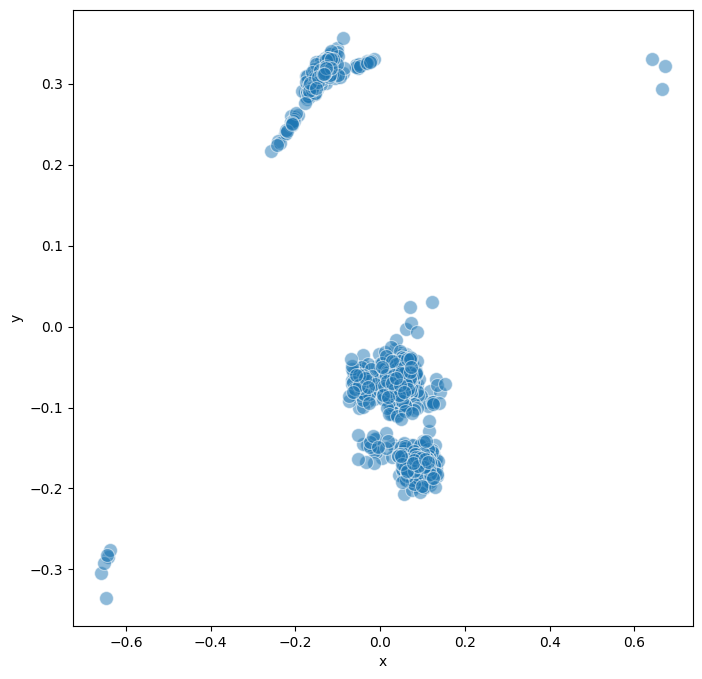

In [7]:
# Perform MDS (Multidimensional Scaling) for visualization
model.trajectory.calculate_MDS()
model.trajectory.plot_MDS(s = 100, fig_size = (8,8))

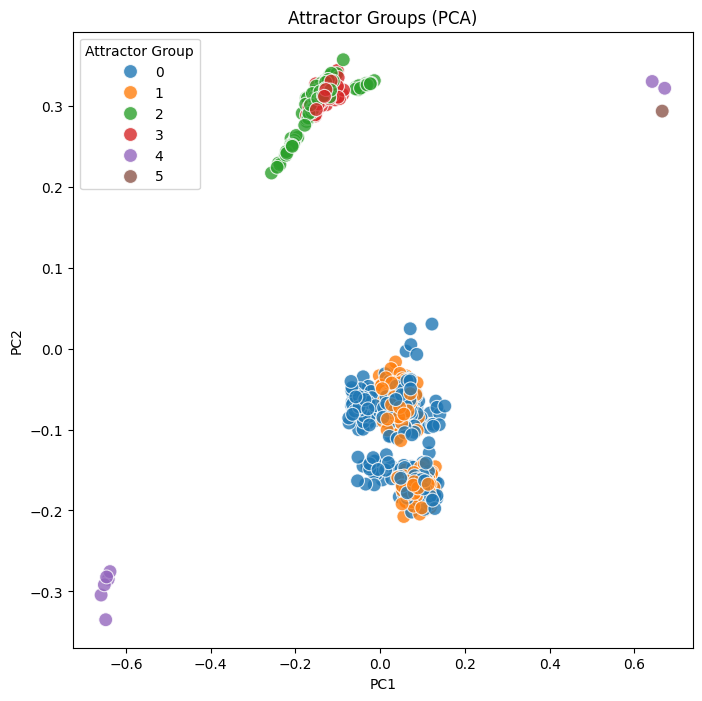

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

attractor_group_path = '/home/spankaew/Git/astrologics/data/attractor_group/attractor_group/' + model_name + '_attractor_group.csv'
attractor_group = pd.read_csv(attractor_group_path, index_col = 0)
attractor_group_dict = attractor_group['attractor_group'].to_dict()


coords = model.trajectory.mds_coords
coords['attractor_group'] = coords.index.map(attractor_group_dict)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=coords['x'],
    y=coords['y'],
    hue=coords['attractor_group'],
    palette='tab10',
    s=100,
    alpha=0.8
)
plt.legend(title="Attractor Group")
plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Attractor Groups (PCA)')
plt.show()

In [10]:
states_df = model.simulation.simulation_df
states_df.drop('timepoint', axis=1, inplace=True)
states_df.set_index('model_id', inplace=True)

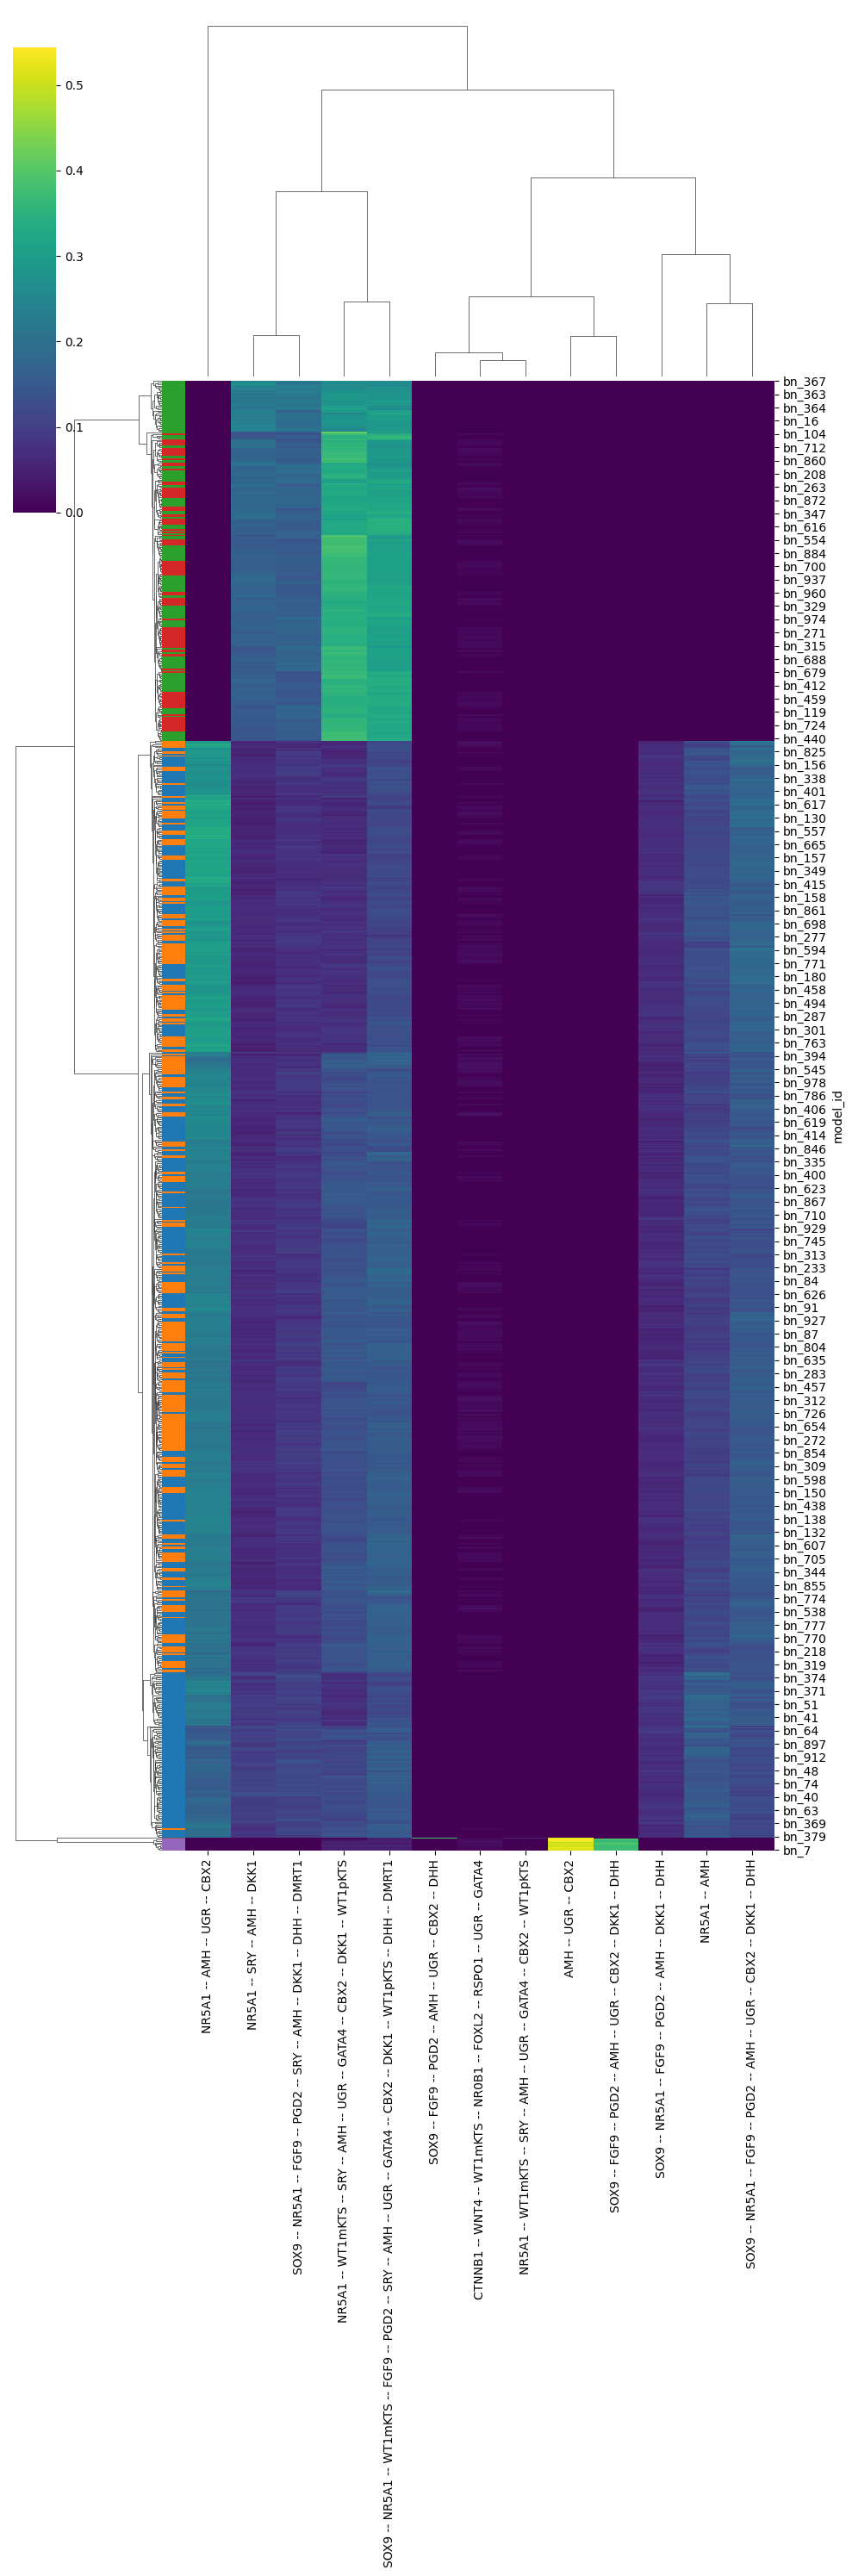

In [12]:
import matplotlib.colors as mcolors



# Map attractor group values to colors
unique_groups = attractor_group['attractor_group'].unique()
color_palette = sns.color_palette('tab10', len(unique_groups))
color_map = dict(zip(unique_groups, color_palette))
row_colors = states_df.index.map(attractor_group_dict).map(color_map)

sns.clustermap(states_df, cmap='viridis', figsize=(10, 30), row_colors=row_colors)

In [13]:
from sklearn.manifold import TSNE

# Calculate the UMAP coordinates
distance_matrix = model.trajectory.distance_matrix
tsne = TSNE(
    n_components=2,
    metric="precomputed",
    init = 'random',
    perplexity=30,      # must be < n/3
    learning_rate="auto",
    random_state=45,
    n_iter=1000,
    verbose=1
)
coords = tsne.fit_transform(distance_matrix)

# Store the UMAP coordinates in a DataFrame
coords_vis = pd.DataFrame(coords, columns=['x', 'y'], index=distance_matrix.index)
model.trajectory.mds_coords = coords_vis

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.013934
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.876701
[t-SNE] KL divergence after 1000 iterations: 0.858537


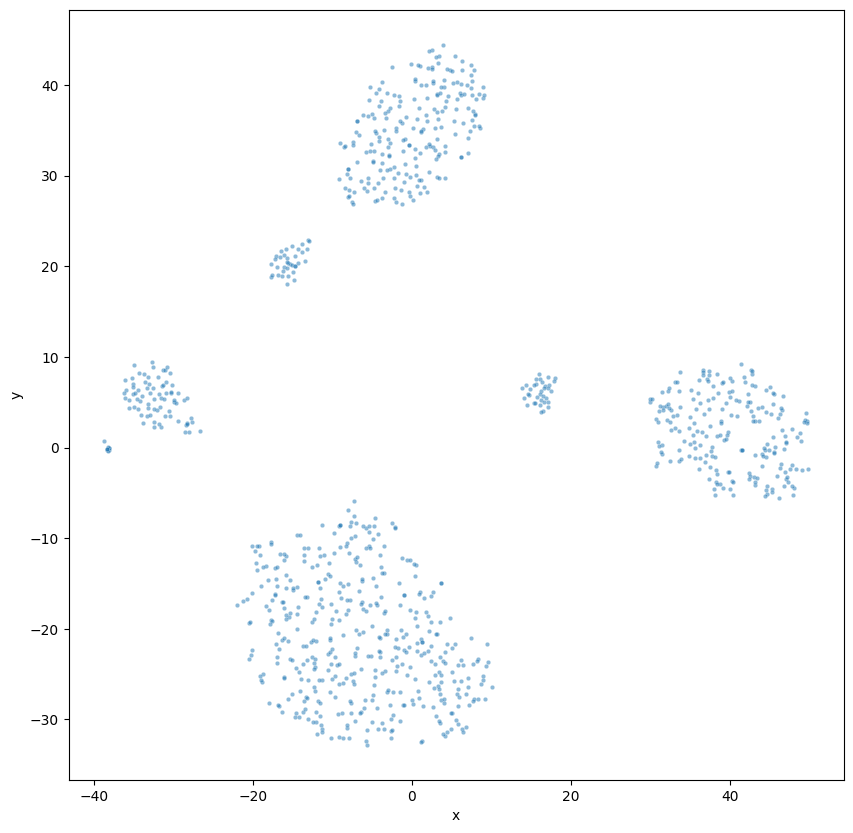

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
coords = model.trajectory.mds_coords
plt.figure(figsize=(10,10))
# Plot without cluster labels
sns.scatterplot(x=coords['x'], y=coords['y'],
                alpha=0.5, s=10)

plt.grid(False)
plt.show()

In [17]:
model.trajectory.calculate_kmean_cluster(n_cluster= 5, random_state = 12345)

Calculated k-means clustering with 5 clusters.


In [15]:
attractor_group_path = '/home/spankaew/Git/astrologics/data/attractor_group/attractor_group/' + model_name + '_attractor_group.csv'
attractor_group = pd.read_csv(attractor_group_path, index_col = 0)
attractor_group_dict = attractor_group['attractor_group'].to_dict()

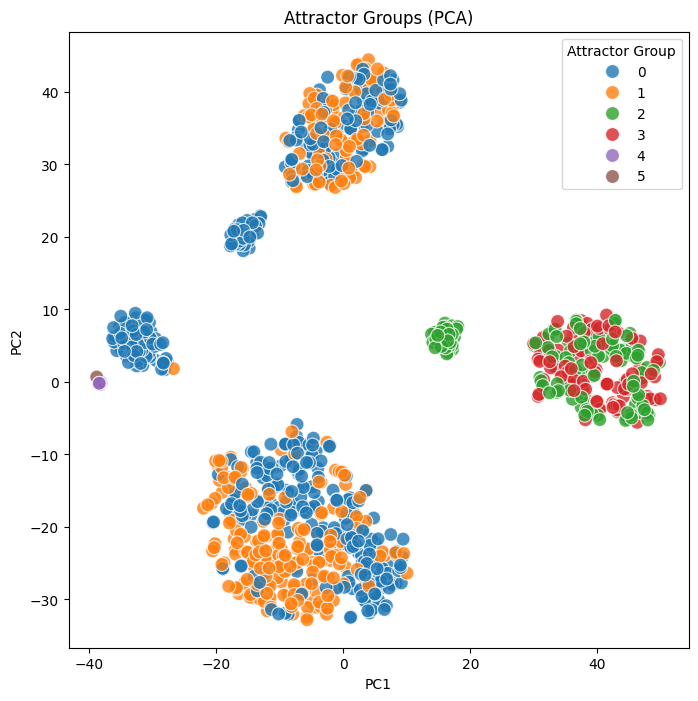

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
coords = model.trajectory.mds_coords
coords['attractor_group'] = coords.index.map(attractor_group_dict)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=coords['x'],
    y=coords['y'],
    hue=coords['attractor_group'],
    palette='tab10',
    s=100,
    alpha=0.8
)
plt.legend(title="Attractor Group")
plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Attractor Groups (PCA)')
plt.show()

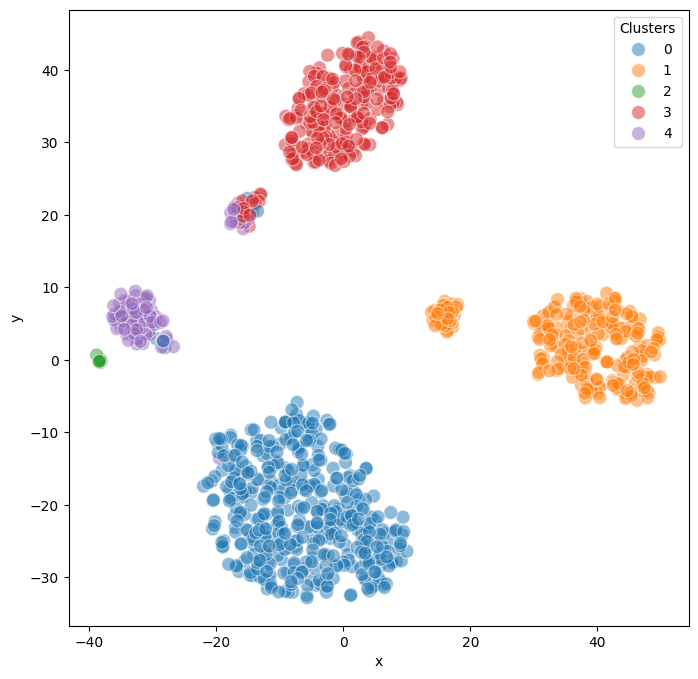

In [18]:
model.trajectory.plot_MDS(plot_cluster=True, fig_size = (8,8), s =100)

In [17]:
import umap
distance_matrix = model.trajectory.distance_matrix
# UMAP with precomputed distances
reducer = umap.UMAP(
    metric="precomputed",
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    random_state=42
)
coords = reducer.fit_transform(distance_matrix)  # shape (n_samples, 2)

# Store the UMAP coordinates in a DataFrame
coords_vis = pd.DataFrame(coords, columns=['x', 'y'], index=distance_matrix.index)
model.trajectory.mds_coords = coords_vis

/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/umap/umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
/home/spankaew/anaconda3/envs/astrologics/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


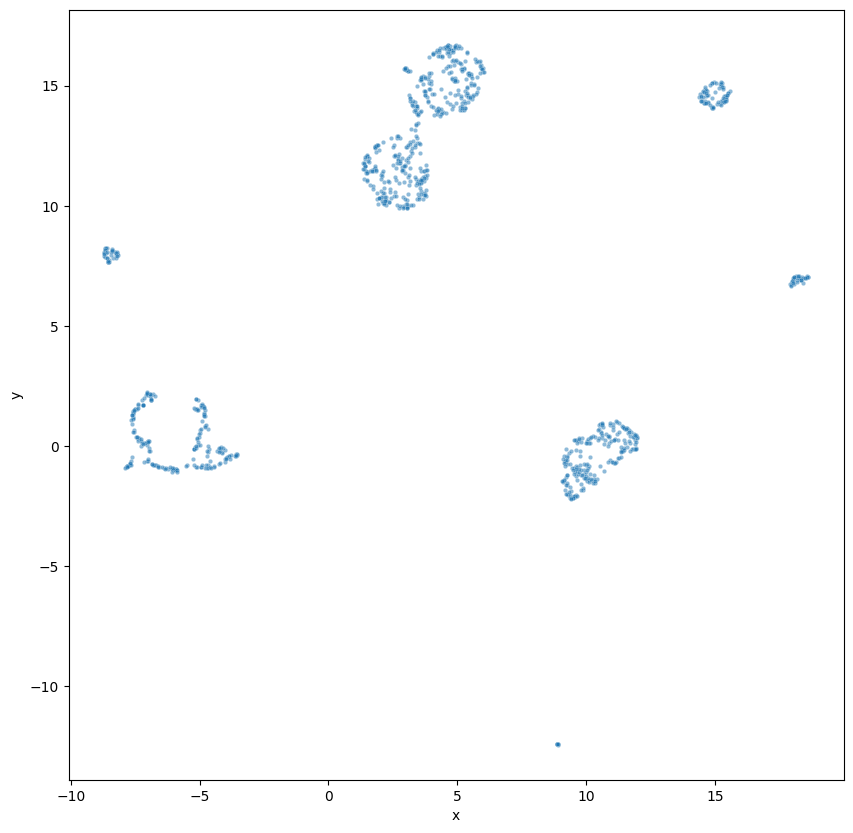

In [18]:
coords = coords_vis
plt.figure(figsize=(10,10))
# Plot without cluster labels
sns.scatterplot(x=coords['x'], y=coords['y'],
                alpha=0.5, s=10)

plt.grid(False)
plt.show()

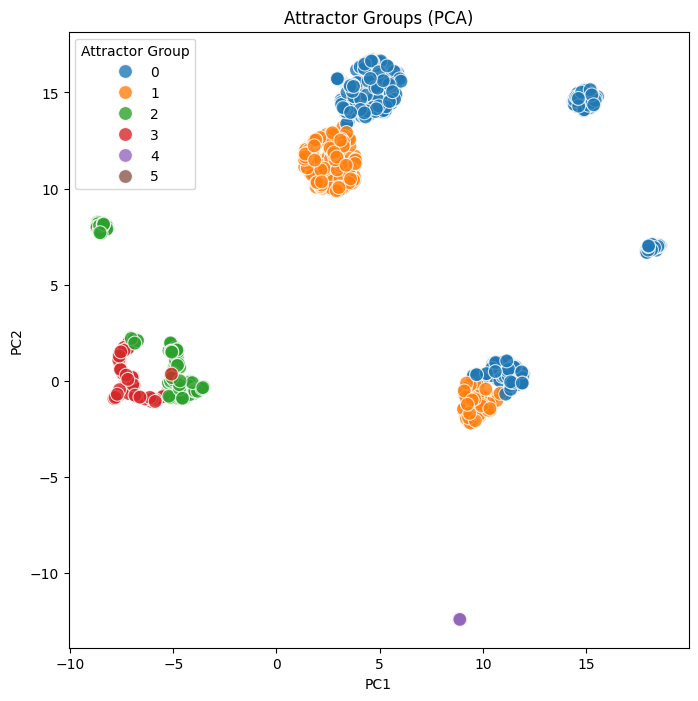

In [19]:
attractor_group_path = '/home/spankaew/Git/astrologics/data/attractor_group/attractor_group/' + model_name + '_attractor_group.csv'
attractor_group = pd.read_csv(attractor_group_path, index_col = 0)
attractor_group_dict = attractor_group['attractor_group'].to_dict()


coords = model.trajectory.mds_coords
coords['attractor_group'] = coords.index.map(attractor_group_dict)

plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=coords['x'],
    y=coords['y'],
    hue=coords['attractor_group'],
    palette='tab10',
    s=100,
    alpha=0.8
)
plt.legend(title="Attractor Group")
plt.grid(False)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Attractor Groups (PCA)')
plt.show()

In [25]:
endtimepoint_df = model.simulation.simulation_df[model.simulation.simulation_df['timepoint'] == 29]
endtimepoint_df.set_index('model_id', inplace=True)
endtimepoint_df.drop(columns=['timepoint'], inplace=True)


/tmp/ipykernel_55484/3813103210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  endtimepoint_df.drop(columns=['timepoint'], inplace=True)


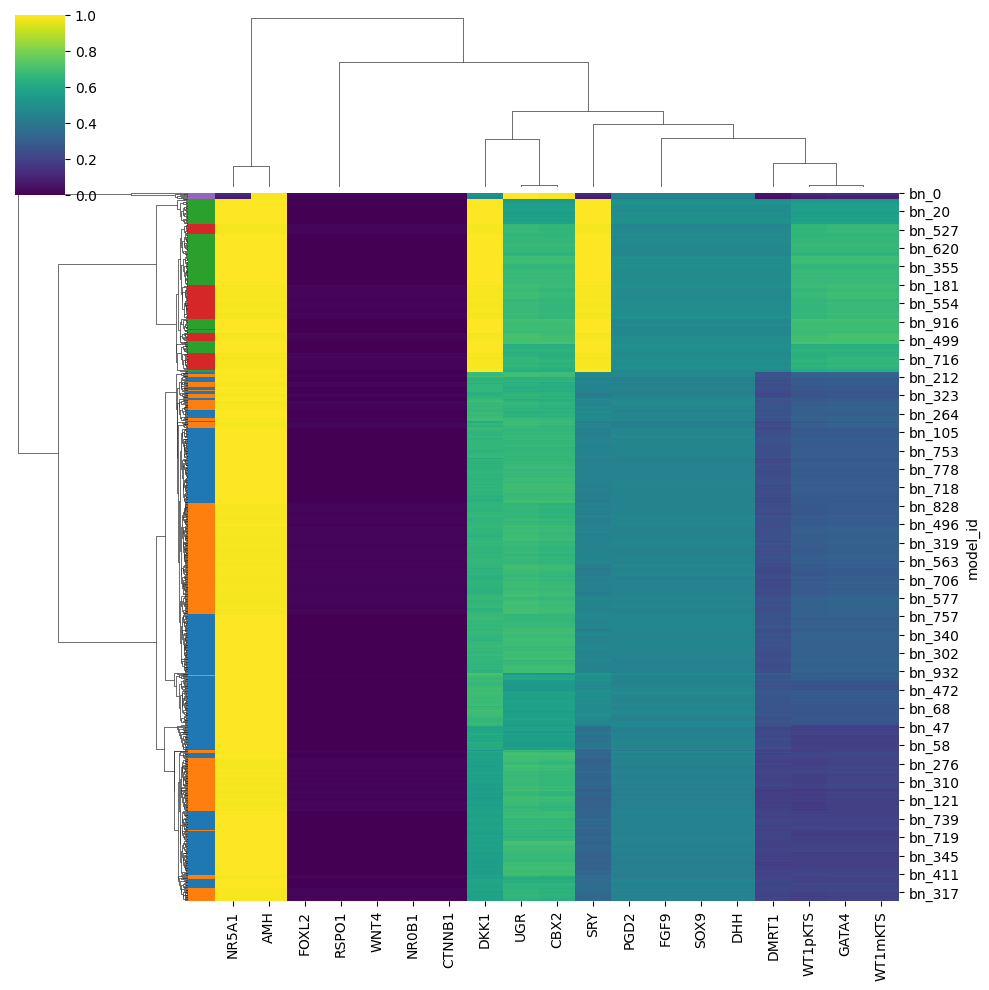

In [26]:
import matplotlib.colors as mcolors

# Map attractor group values to colors
unique_groups = attractor_group['attractor_group'].unique()
color_palette = sns.color_palette('tab10', len(unique_groups))
color_map = dict(zip(unique_groups, color_palette))
row_colors = endtimepoint_df.index.map(attractor_group_dict).map(color_map)

sns.clustermap(endtimepoint_df, cmap='viridis', figsize=(10, 10), row_colors=row_colors)

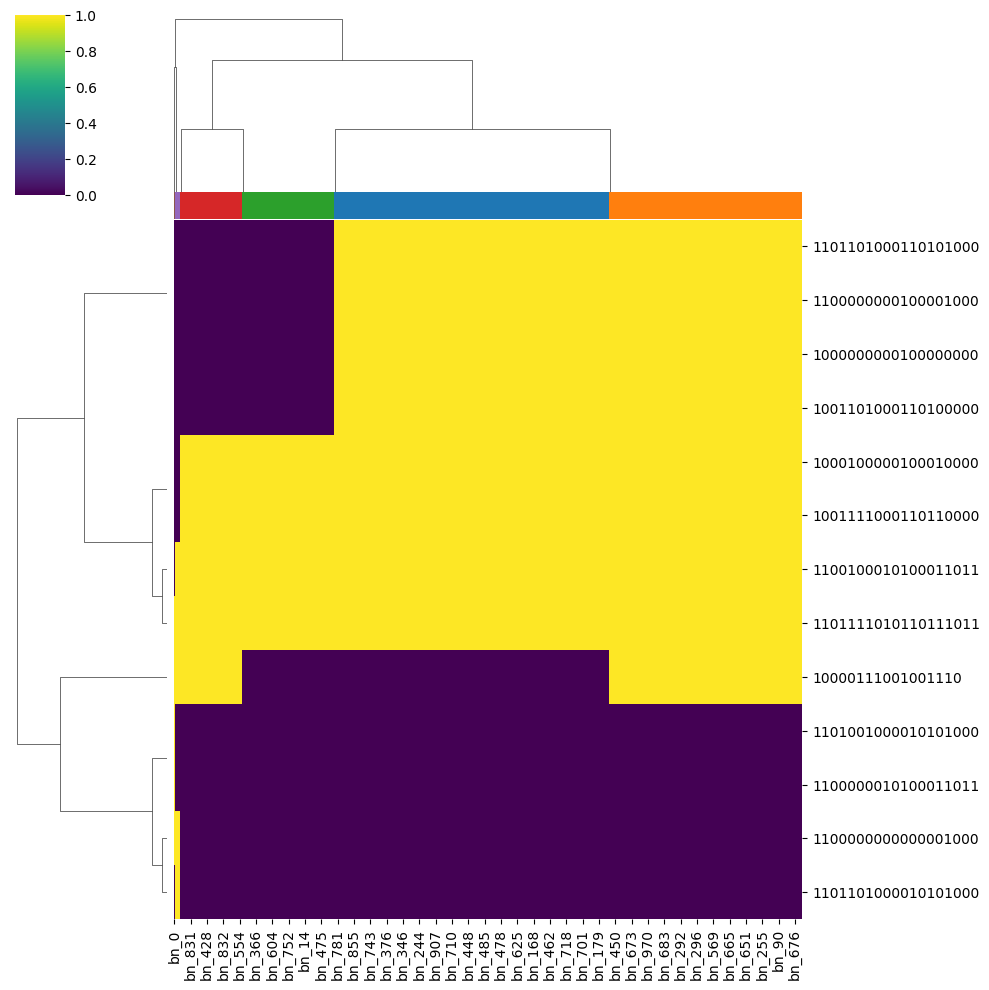

In [28]:
attractor_df = attractor_data

# Map attractor group values to colors
unique_groups = attractor_group['attractor_group'].unique()
color_palette = sns.color_palette('tab10', len(unique_groups))
color_map = dict(zip(unique_groups, color_palette))
row_colors = attractor_df.columns.map(attractor_group_dict).map(color_map)
sns.clustermap(attractor_df, cmap='viridis', figsize=(10, 10), col_colors=row_colors)